In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
file_path = "/Users/raitovn/OneDrive - Rose-Hulman Institute of Technology/Desktop/XTERN 2024/DataSet2.csv"
df = pd.read_csv(file_path)

# Exploratory data analysis (EDA)

In [2]:
# Quickly view the data
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [3]:
# Show the head of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [4]:
# Show the columns of the dataset
df.columns

Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')

In [5]:
# Print the head of the dataset
df.shape

(5000, 5)

# Year, Major, University, Time, Order Distribution

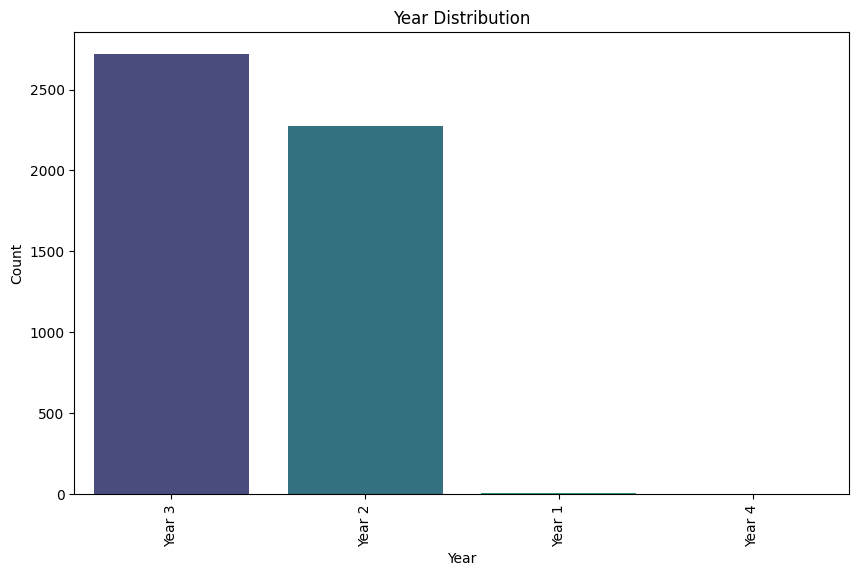

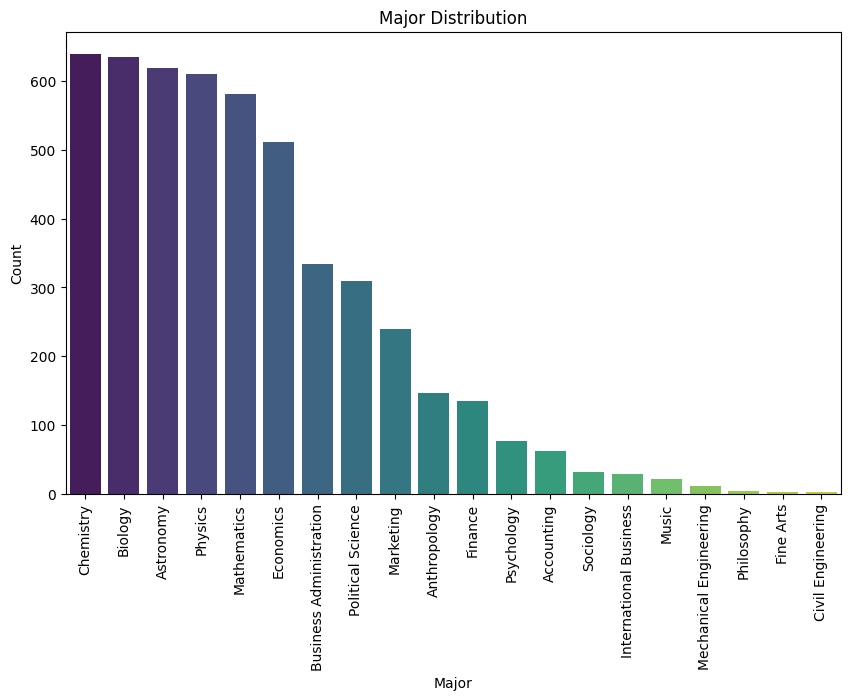

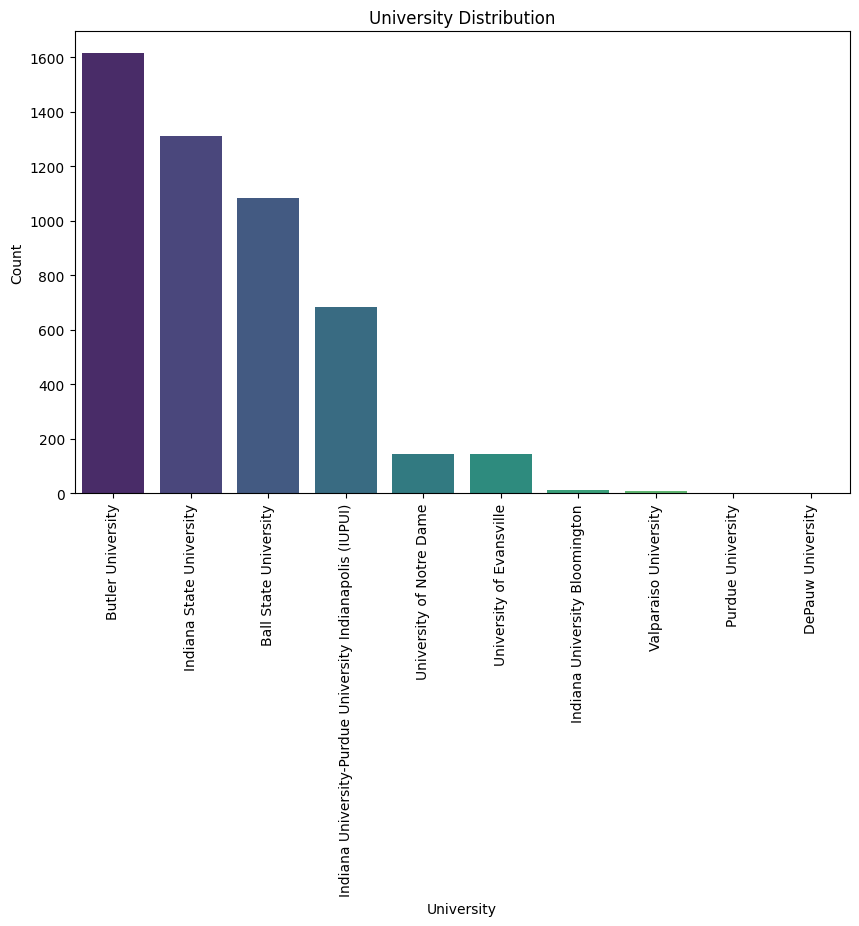

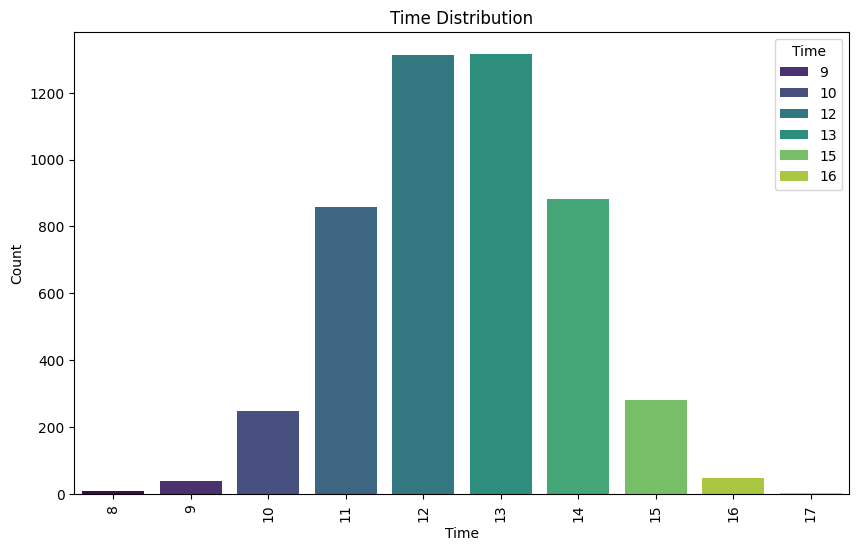

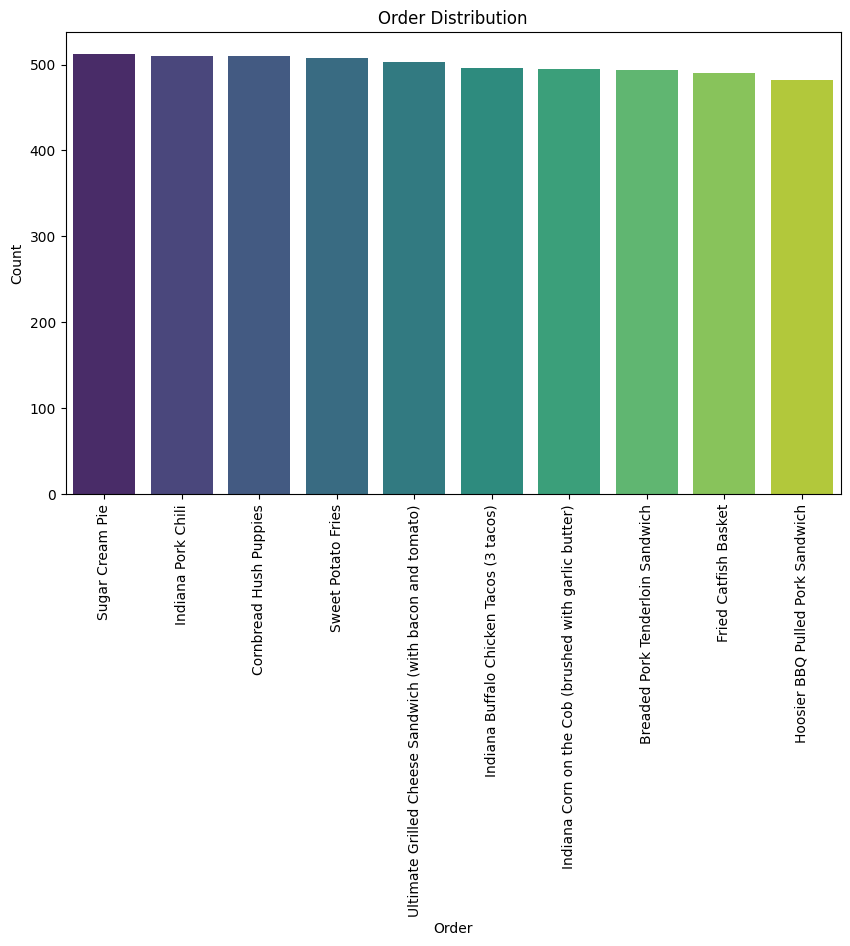

In [6]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Create a bar plot using seaborn
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), hue=df[col].value_counts().index, palette="viridis", dodge=False)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col + ' Distribution')
    plt.show()


# Charts displaying order preferences throughout the years.

In [7]:
df.describe(include=['object'])

,Year,Major,University,Order
count,5000,5000,5000,5000
unique,4,20,10,10
top,Year 3,Chemistry,Butler University,Sugar Cream Pie
freq,2719,640,1614,512


In [8]:
pd.crosstab(df['Year'], df['Order'])

Order,Breaded Pork Tenderloin Sandwich,Cornbread Hush Puppies,Fried Catfish Basket,Hoosier BBQ Pulled Pork Sandwich,Indiana Buffalo Chicken Tacos (3 tacos),Indiana Corn on the Cob (brushed with garlic butter),Indiana Pork Chili,Sugar Cream Pie,Sweet Potato Fries,Ultimate Grilled Cheese Sandwich (with bacon and tomato)
Year,,,,,,,,,,
Year 1,1,0,0,0,0,0,0,0,2,2
Year 2,364,54,396,71,105,38,428,55,392,370
Year 3,129,456,94,411,388,457,82,457,114,131
Year 4,0,0,0,0,3,0,0,0,0,0


In [9]:
# Calculating the most popular food items
most_popular_items = df['Order'].value_counts().nlargest(10)
print(most_popular_items)

Order
Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: count, dtype: int64


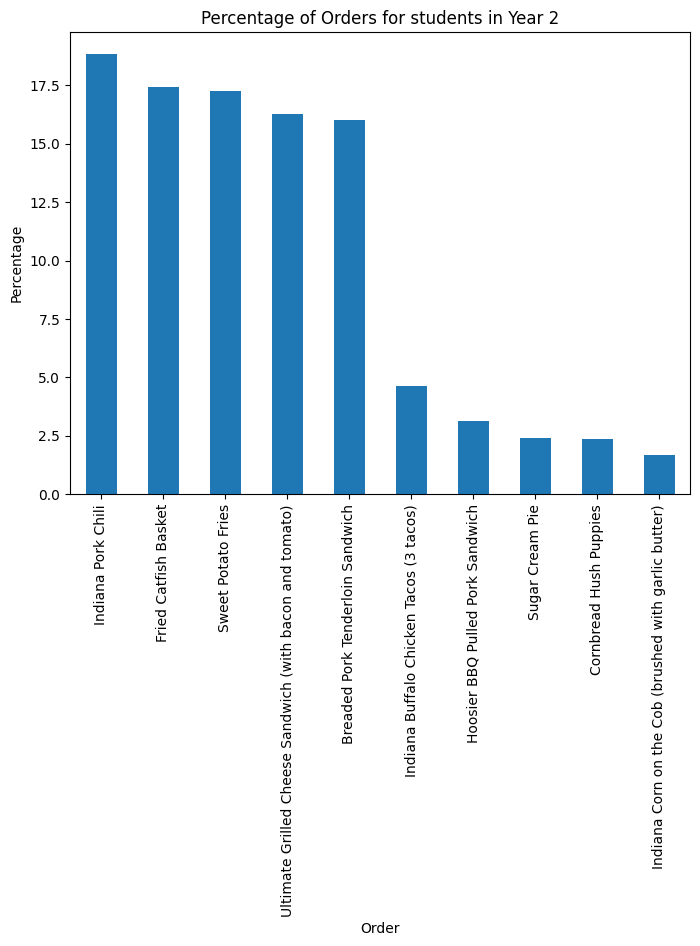

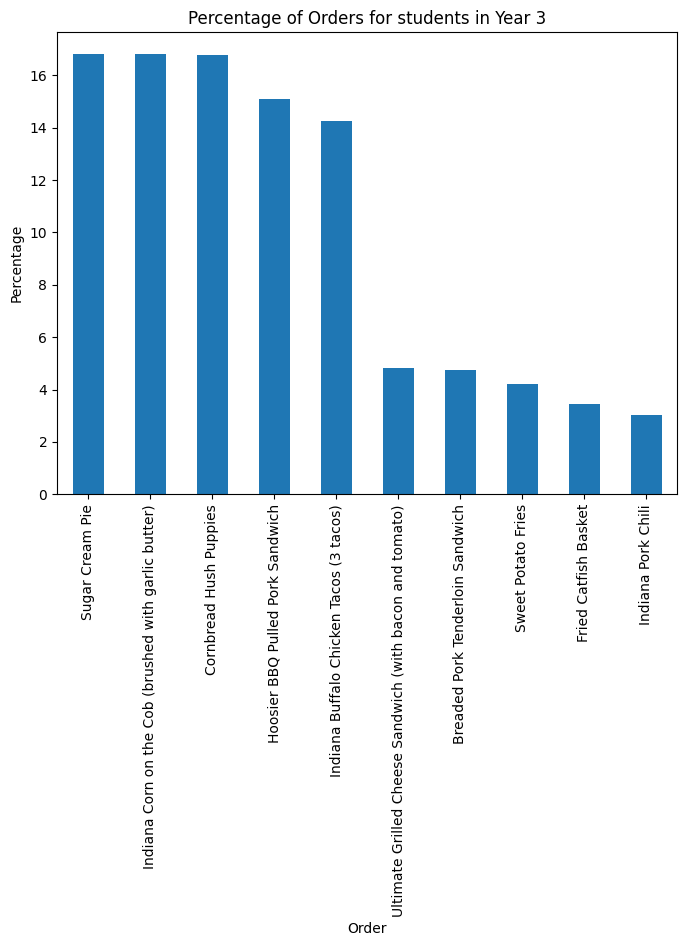

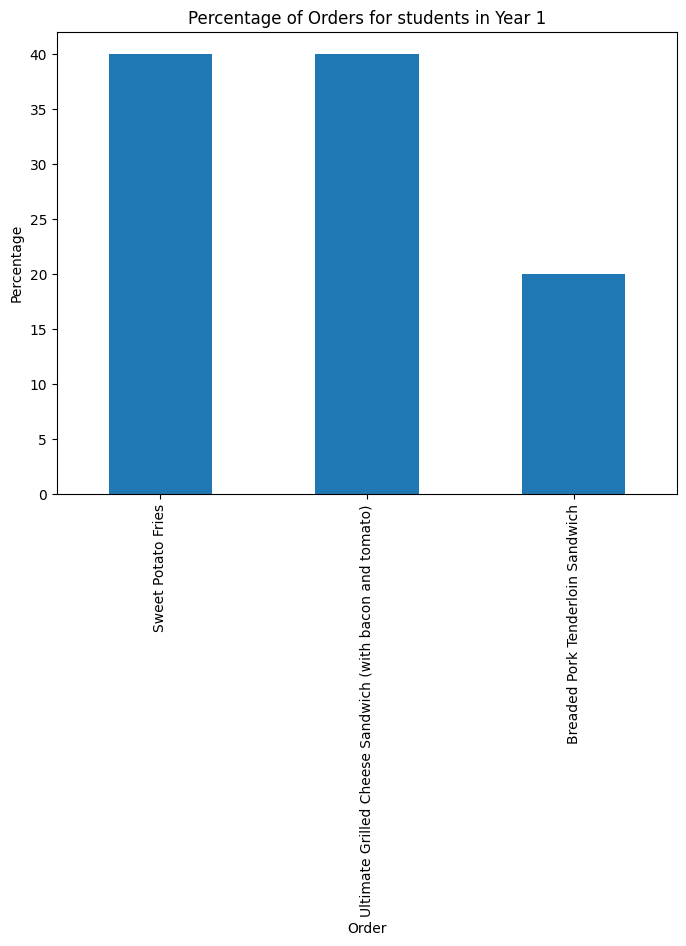

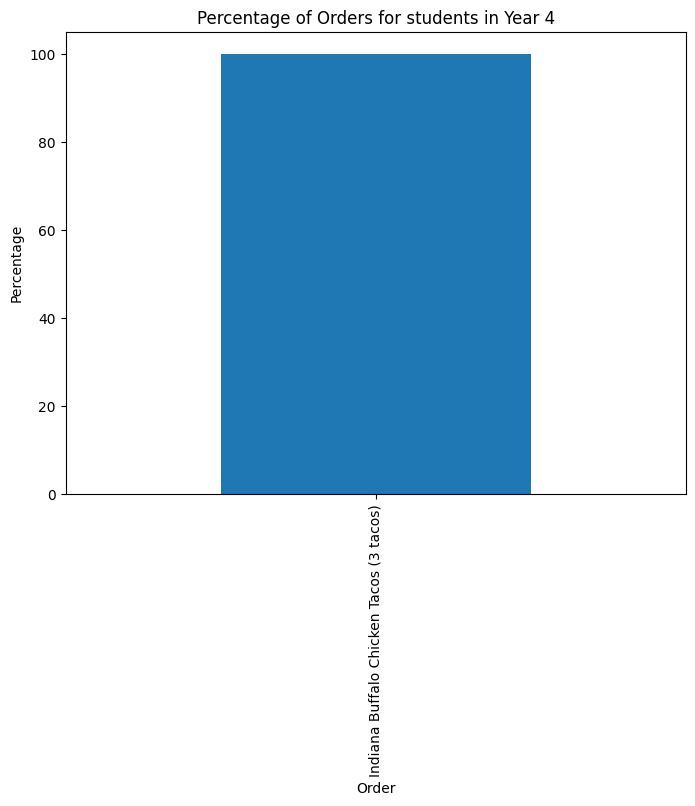

In [10]:
def plot_percentage_distribution(data, title, category_name):
    order_counts = data['Order'].value_counts()
    total_orders = order_counts.sum()
    order_percentages = (order_counts / total_orders) * 100

    plt.figure(figsize=(8, 6))
    order_percentages.plot(kind='bar')
    plt.title(f'Percentage of Orders for {category_name} in {title}')
    plt.xlabel('Order')
    plt.ylabel('Percentage')
    plt.show()

# Plot for years
years = df['Year'].unique()
for year in years:
    year_data = df[df['Year'] == year]
    plot_percentage_distribution(year_data, year, "students")

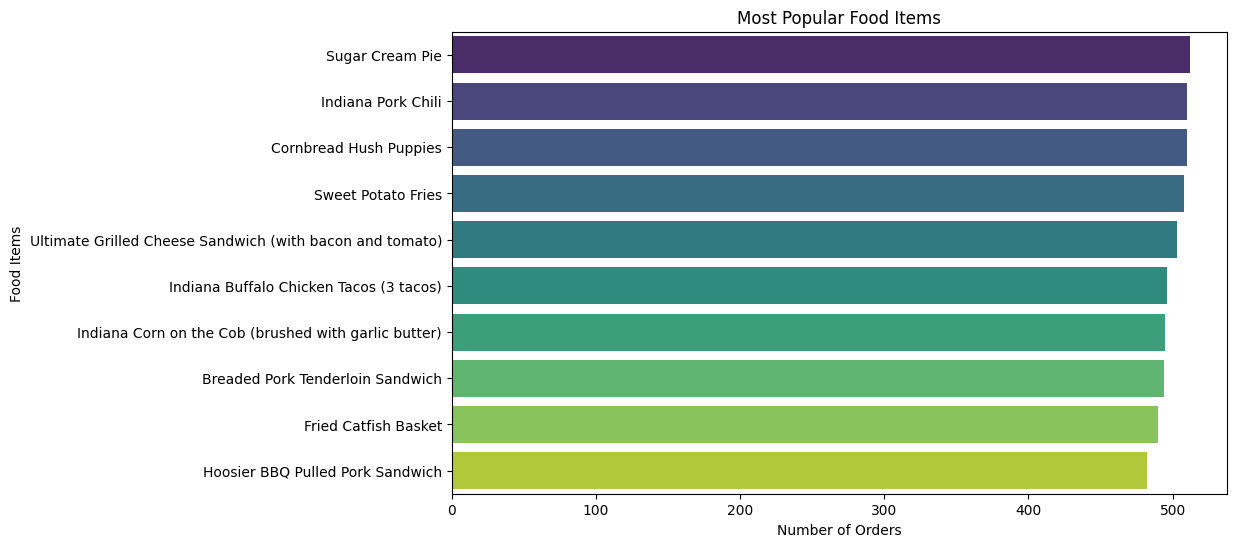

In [11]:
food_items = most_popular_items.index
order_counts = most_popular_items.values


# Assuming most_popular_items is a pandas Series
food_items = most_popular_items.index
order_counts = most_popular_items.values

# Creating a horizontal bar plot for food items x their quantity
plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts, y=food_items, hue=food_items, palette="viridis", dodge=False)
plt.title("Most Popular Food Items")
plt.xlabel("Number of Orders")
plt.ylabel("Food Items")

# Adding labels to the bars for better readability
for i, count in enumerate(order_counts):
    plt.text(count, i, f' {count} ', va='center', ha='left', fontsize=10, fontweight='bold', color='white')

plt.show()

### Summary:

Based on the order counts for various menu items, it is evident that customers have diverse tastes and preferences. Here's a breakdown of the top items:

1. Sugar Cream Pie (512 orders): Sugar Cream Pie is the most-loved item, with 512 orders. People really enjoy this classic dessert because it's sweet and tasty.

2. Indiana Pork Chili (510 orders): Indiana Pork Chili is the second-favorite, showing that many folks like a savory and spicy dish.

3. Cornbread Hush Puppies (510 orders): Cornbread Hush Puppies are also a hit, just like the Indiana Pork Chili. People like having these tasty side dishes with their meals.

4. Sweet Potato Fries (508 orders): Sweet Potato Fries are in fourth place. These might be popular with health-conscious folks or those who want something different from regular fries.

5. Ultimate Grilled Cheese Sandwich (with bacon and tomato) (503 orders): The Ultimate Grilled Cheese Sandwich with bacon and tomato comes in fifth, showing that people enjoy a classic comfort food with a twist.

6. Indiana Buffalo Chicken Tacos (3 tacos) (496 orders): These spicy chicken tacos are sixth in popularity, indicating that people like bold and zesty flavors.

7. Indiana Corn on the Cob (brushed with garlic butter) (495 orders): Indiana Corn on the Cob brushed with garlic butter is seventh. People enjoy this traditional and savory snack.

8. Breaded Pork Tenderloin Sandwich (494 orders): The Breaded Pork Tenderloin Sandwich is eighth and appeals to those looking for a satisfying and classic sandwich.

9. Fried Catfish Basket (490 orders): The Fried Catfish Basket is ninth and shows that people like crispy catfish.

10. Hoosier BBQ Pulled Pork Sandwich (482 orders): The Hoosier BBQ Pulled Pork Sandwich is the tenth favorite, indicating an appreciation for smoky and tender pulled pork.
tender pulled pork.







# Charts displaying order preferences across all majors.

In [12]:
pd.crosstab(df['Major'], df['Order'])

Order,Breaded Pork Tenderloin Sandwich,Cornbread Hush Puppies,Fried Catfish Basket,Hoosier BBQ Pulled Pork Sandwich,Indiana Buffalo Chicken Tacos (3 tacos),Indiana Corn on the Cob (brushed with garlic butter),Indiana Pork Chili,Sugar Cream Pie,Sweet Potato Fries,Ultimate Grilled Cheese Sandwich (with bacon and tomato)
Major,,,,,,,,,,
Accounting,14,14,1,0,16,17,0,0,0,0
Anthropology,0,3,36,37,3,1,8,25,33,0
Astronomy,84,74,33,31,91,94,12,42,30,128
Biology,21,40,80,101,28,27,160,89,87,2
Business Administration,61,66,5,5,55,56,1,3,5,77
Chemistry,45,48,65,87,48,50,107,76,95,19
Civil Engineering,0,0,0,0,1,2,0,0,0,0
Economics,18,11,71,89,8,20,131,88,73,2
Finance,24,33,0,0,44,31,0,0,0,3


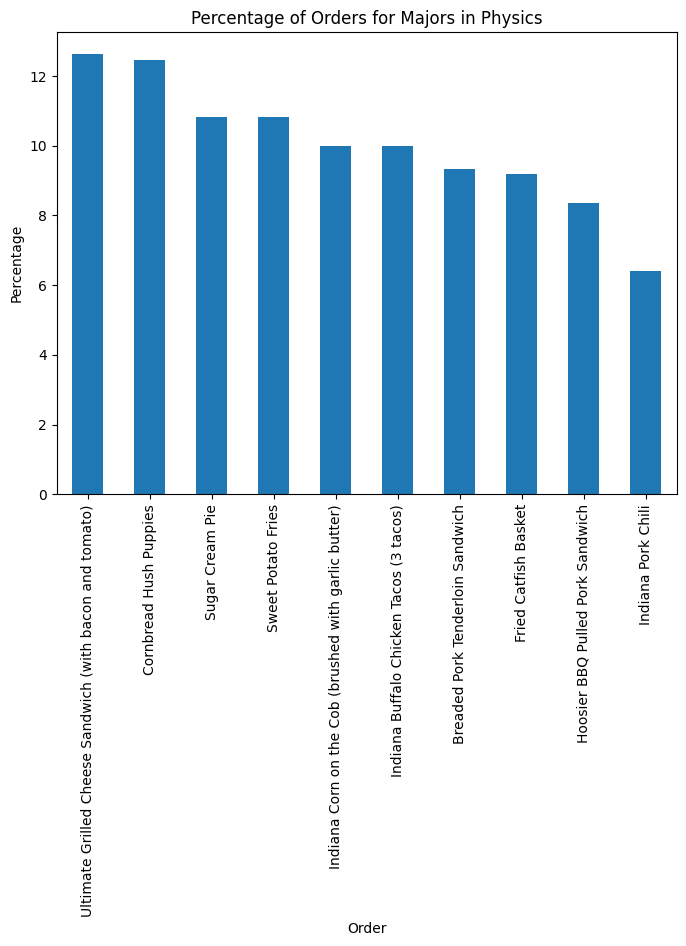

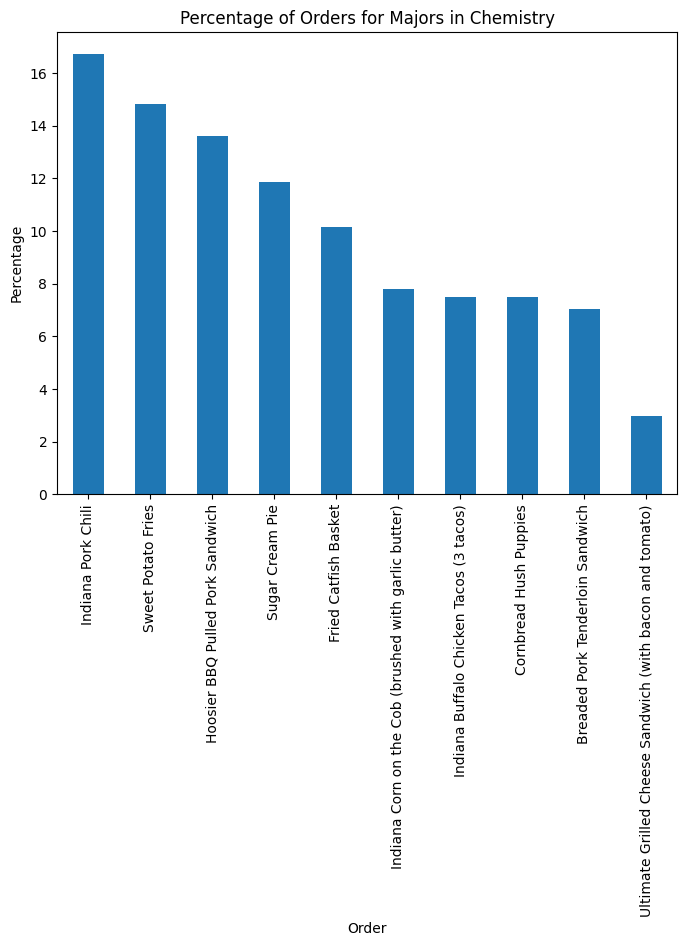

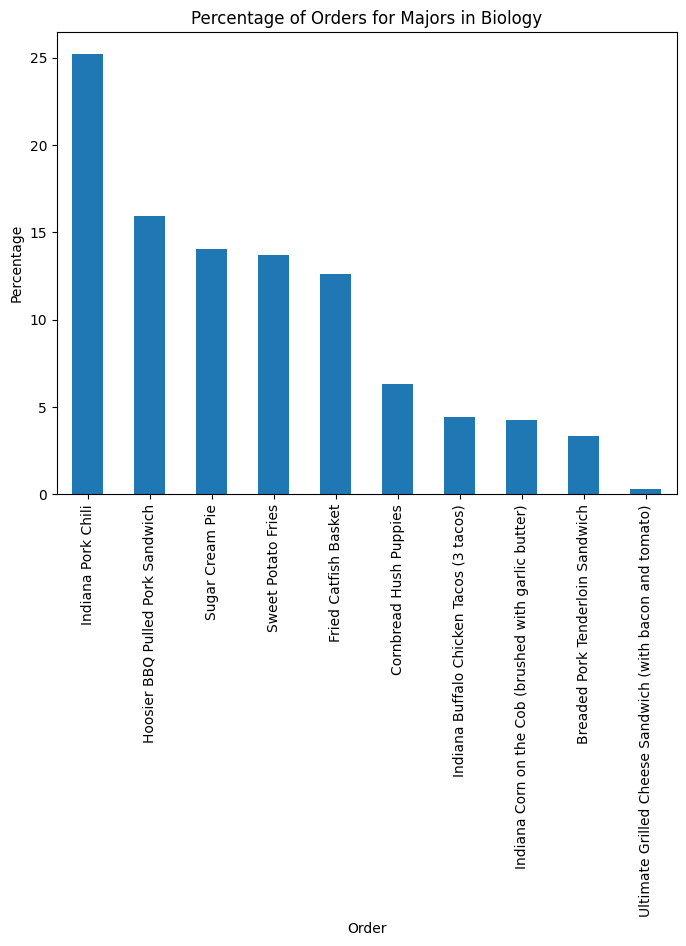

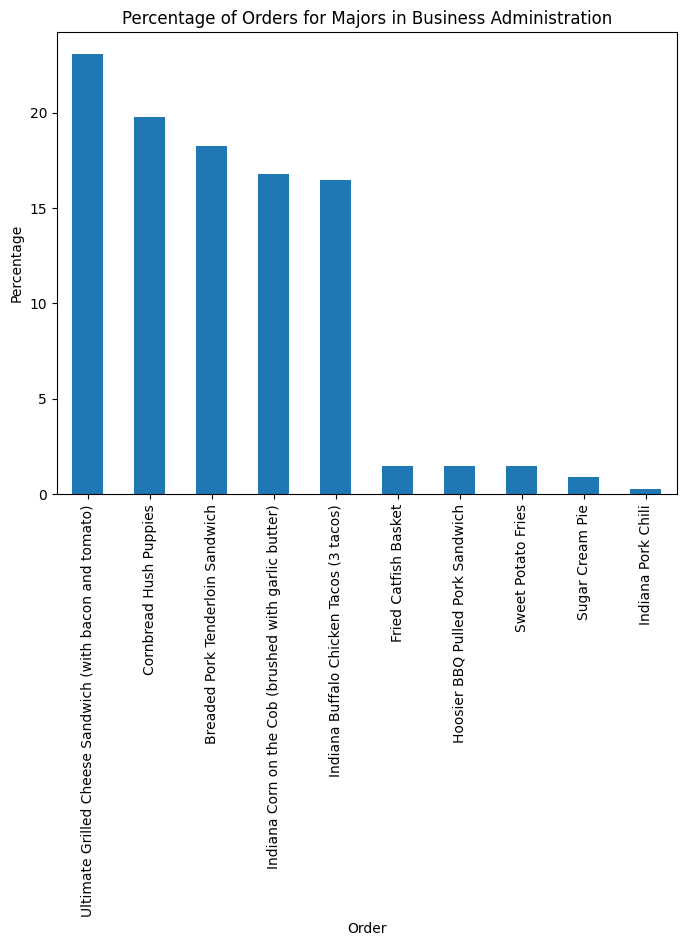

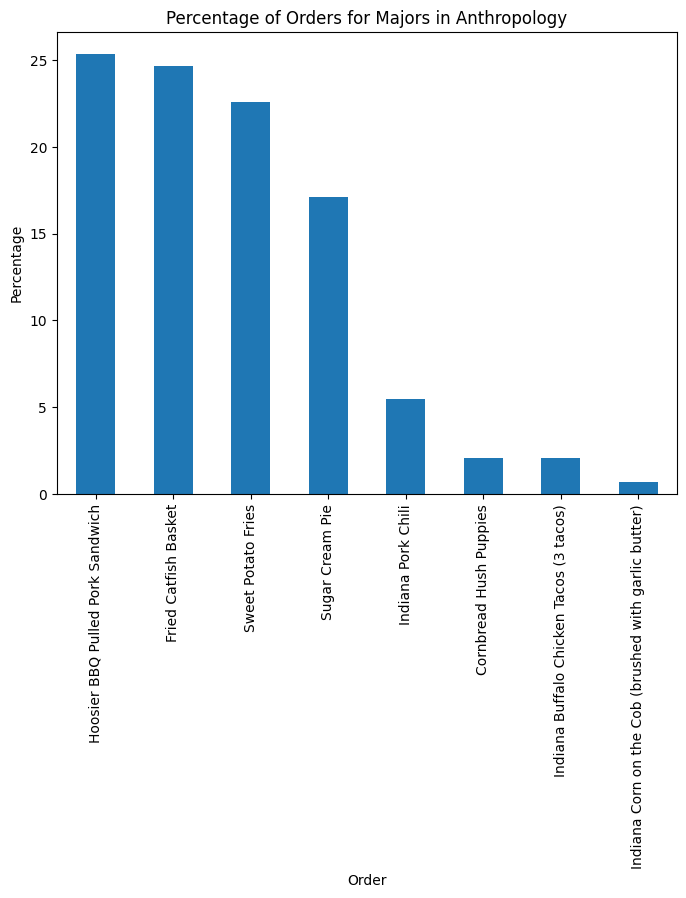

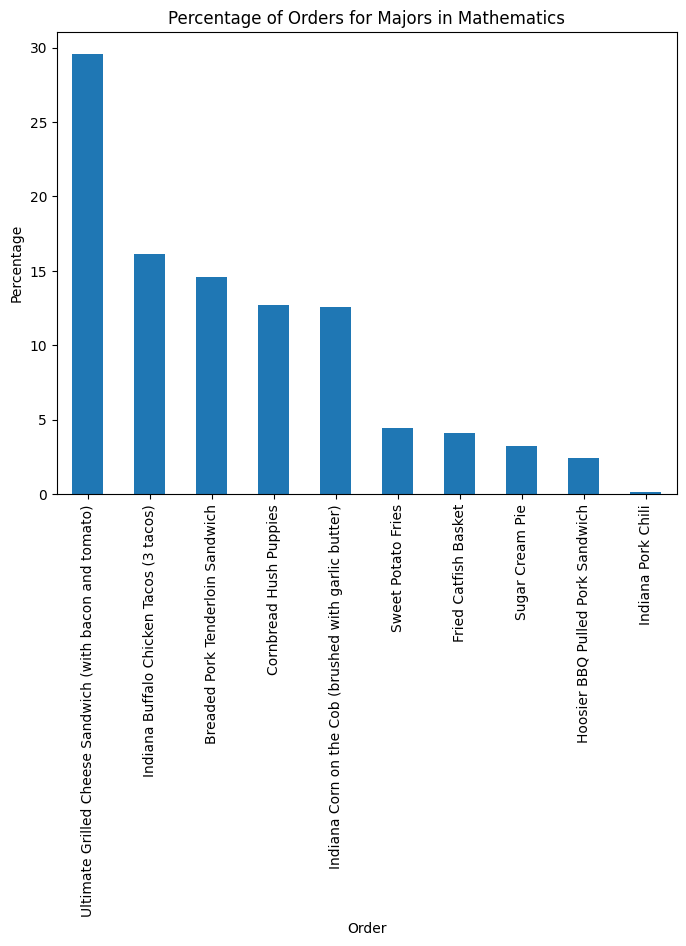

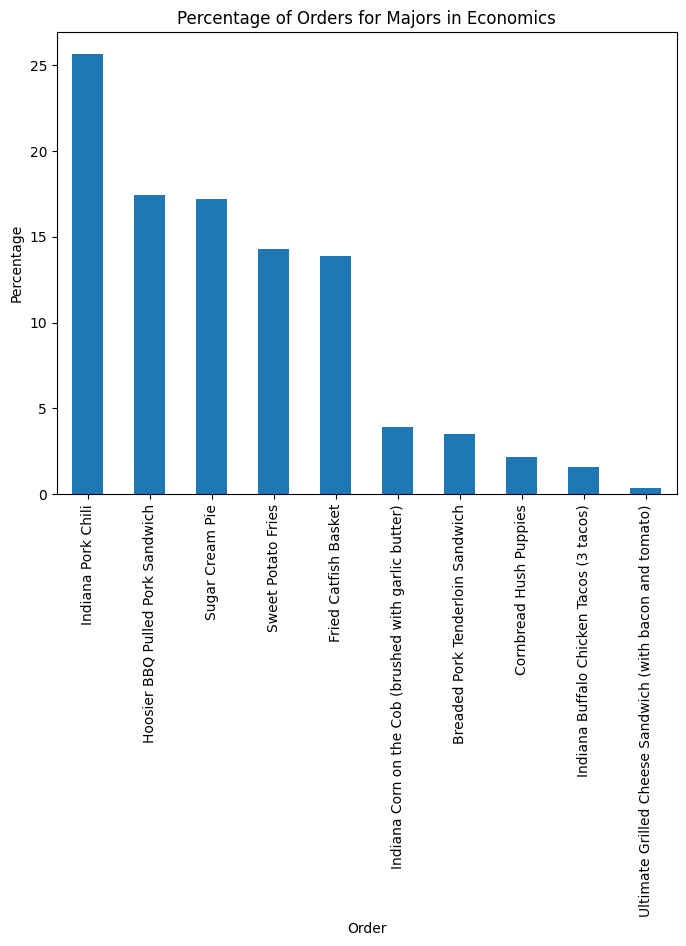

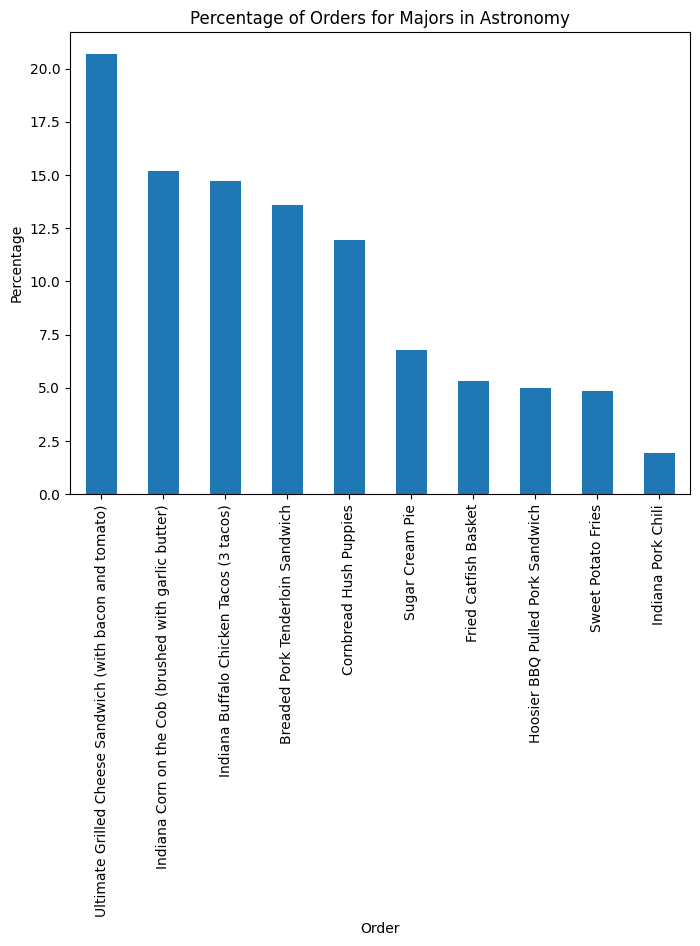

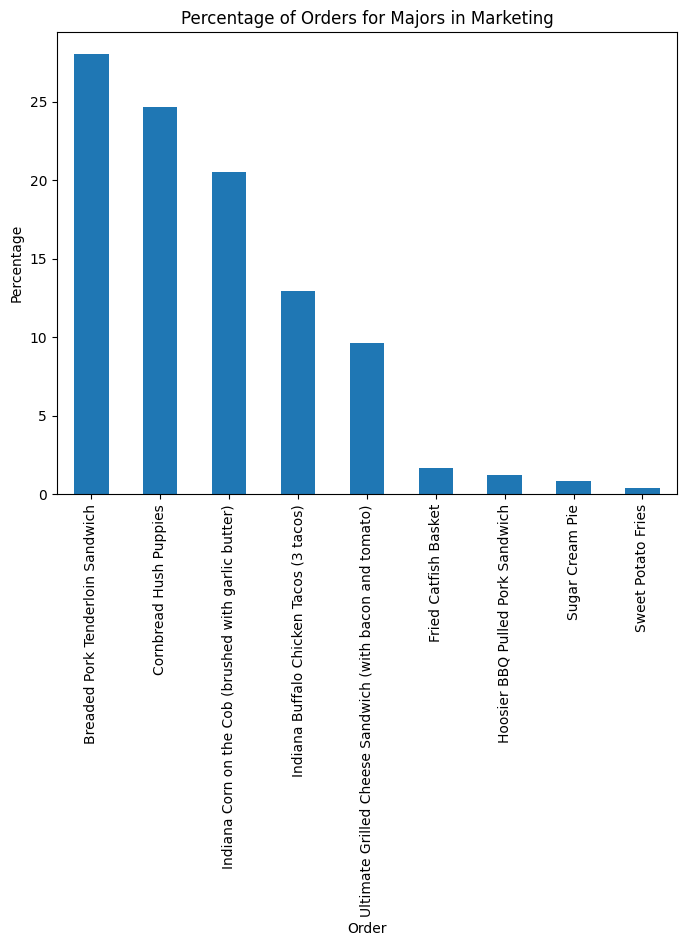

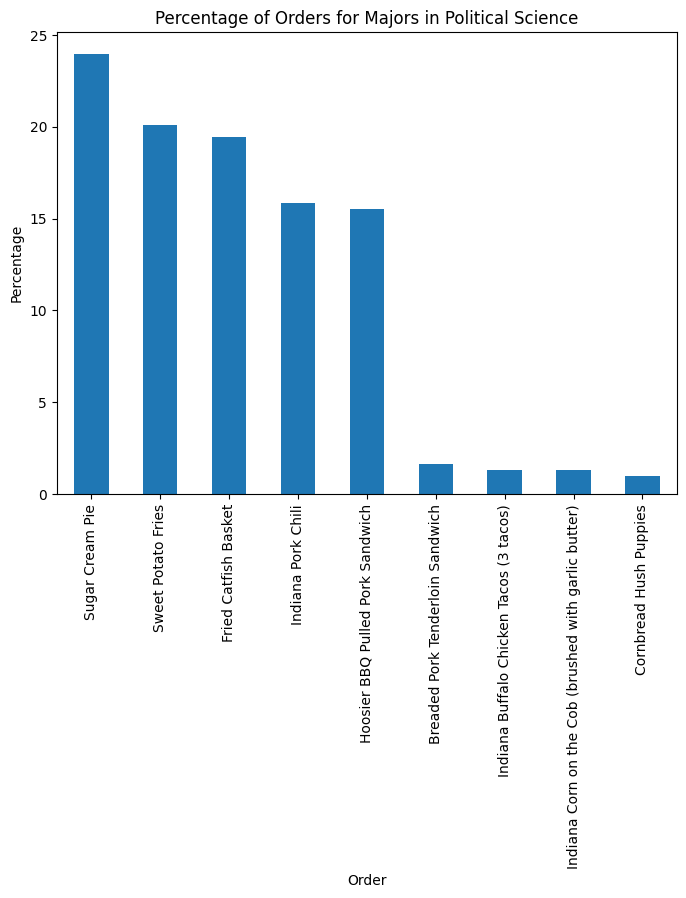

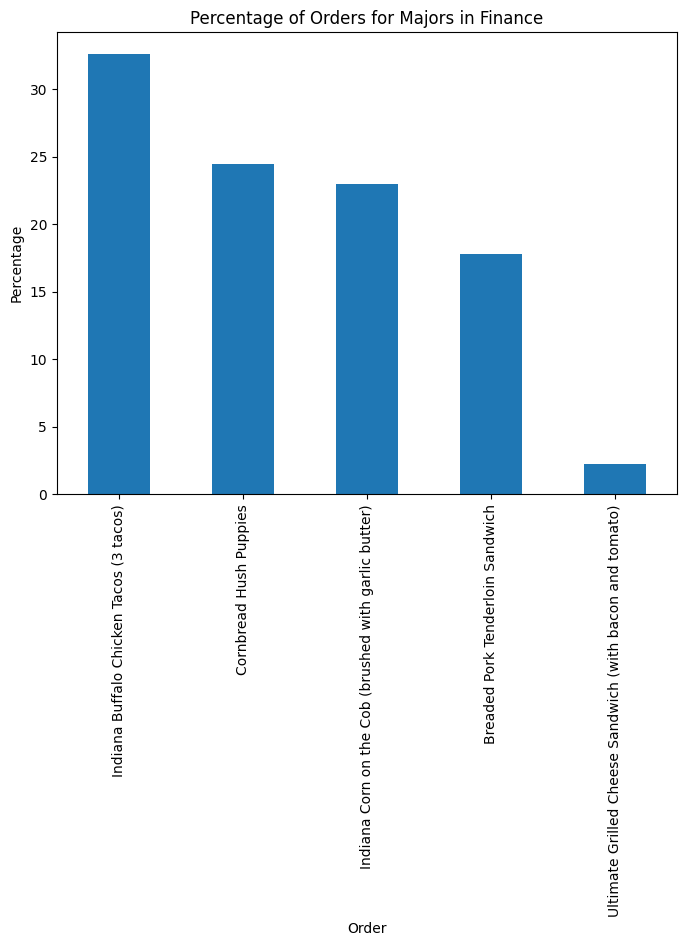

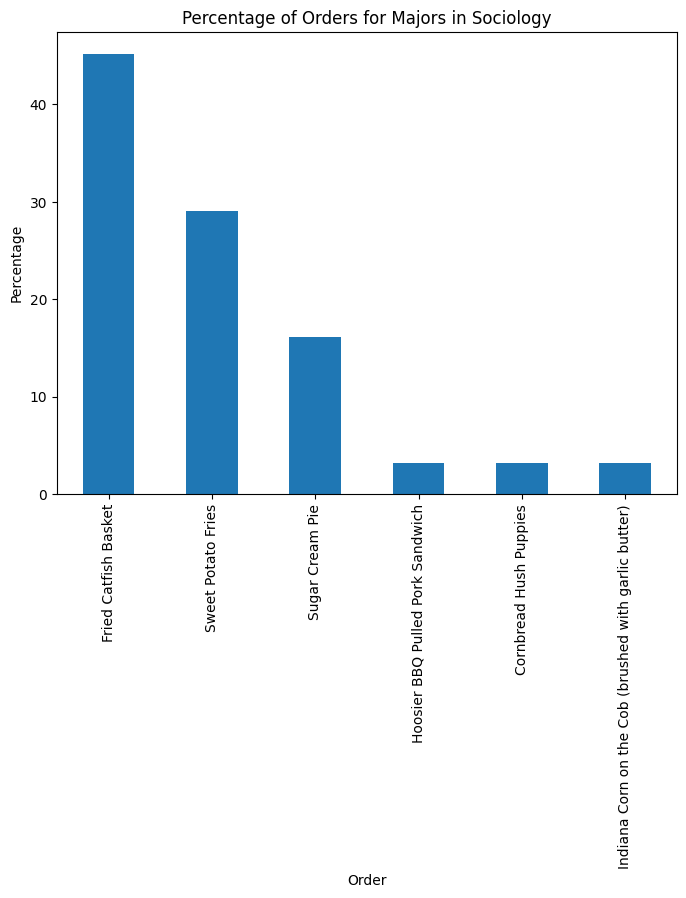

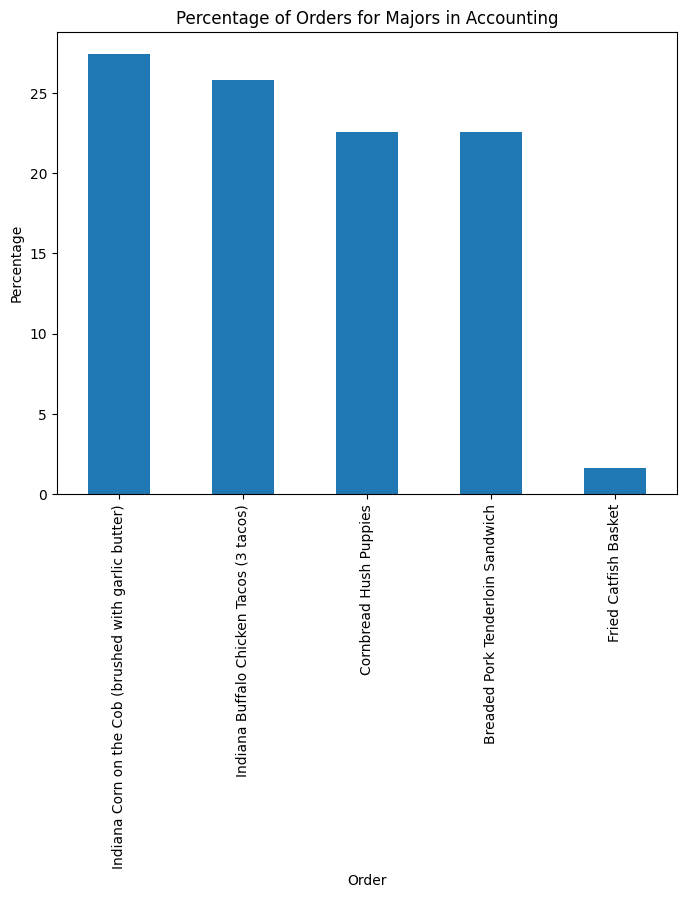

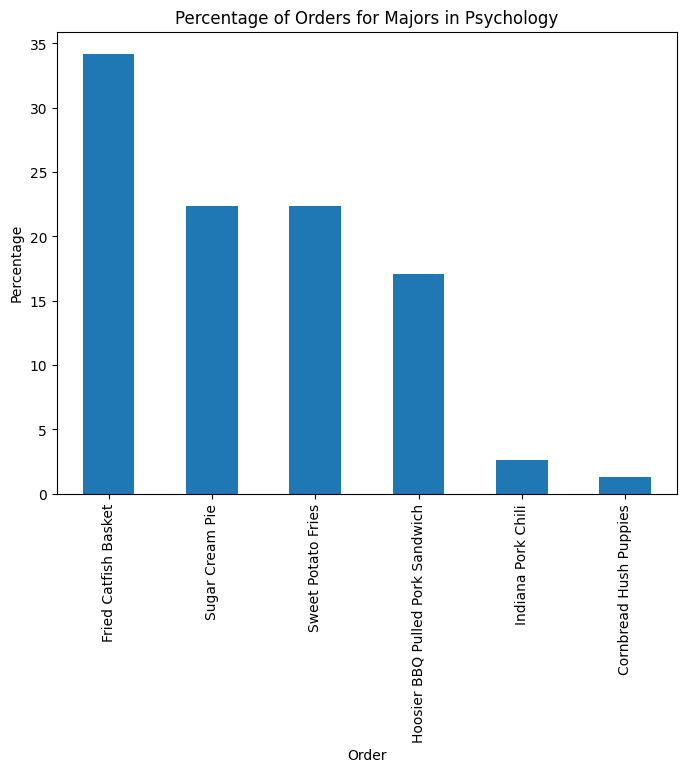

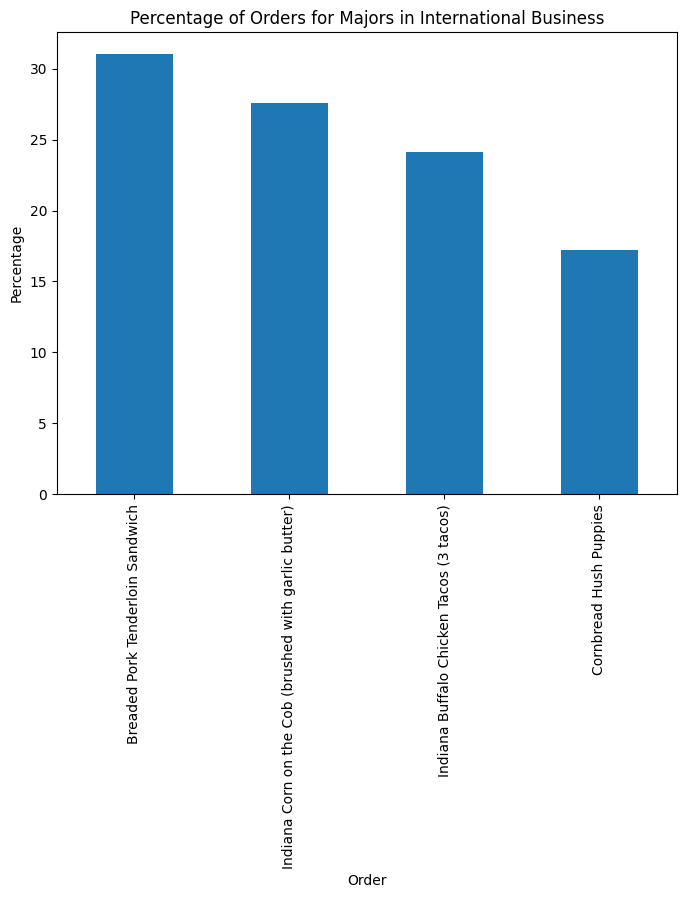

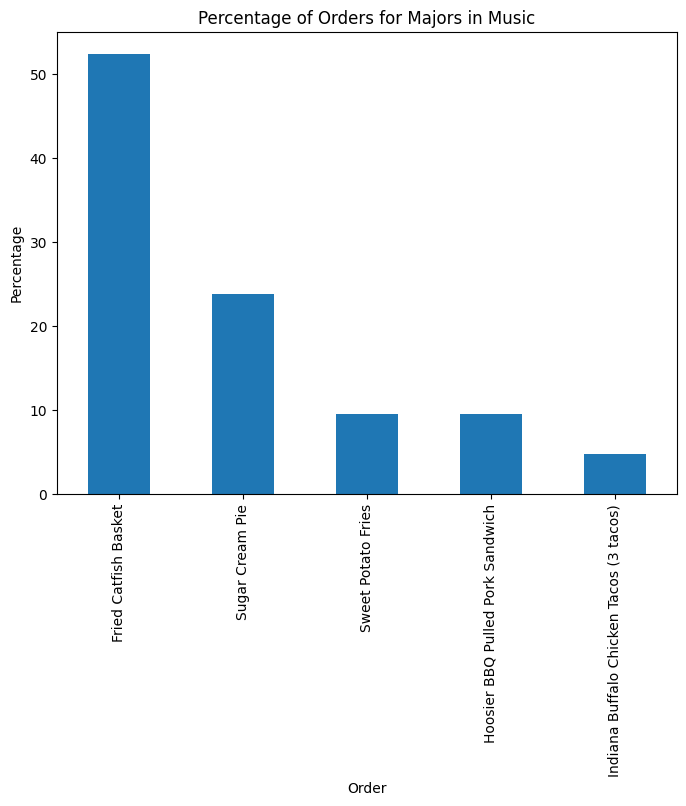

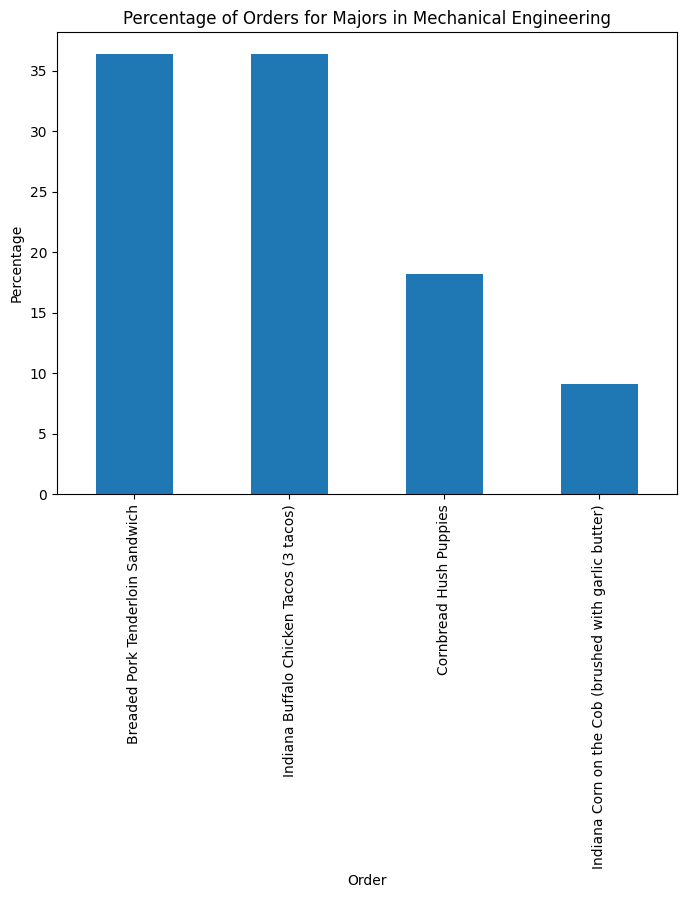

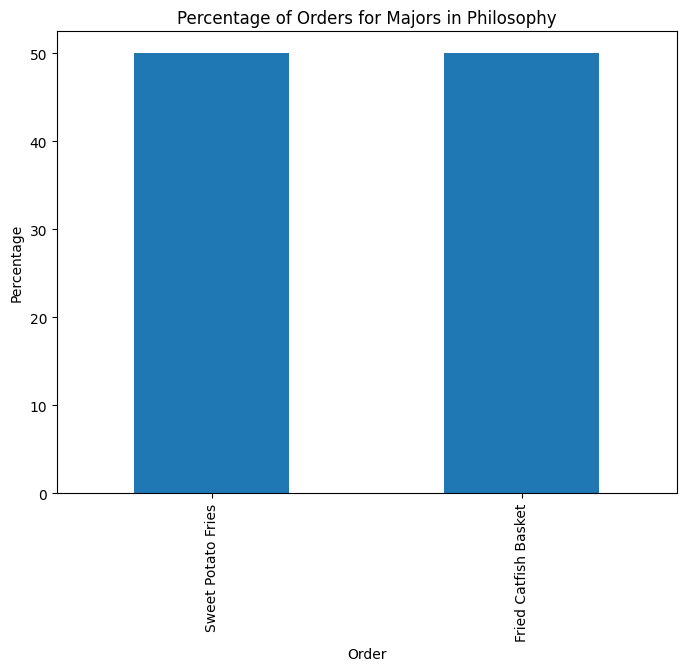

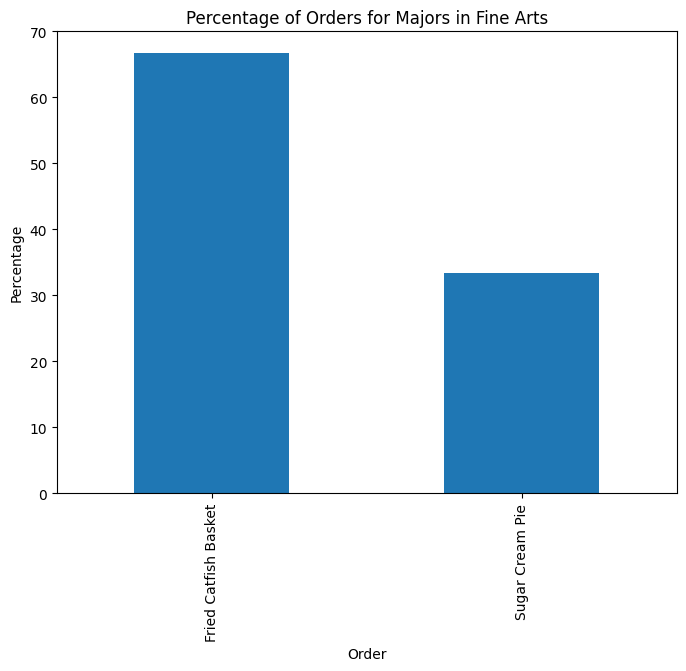

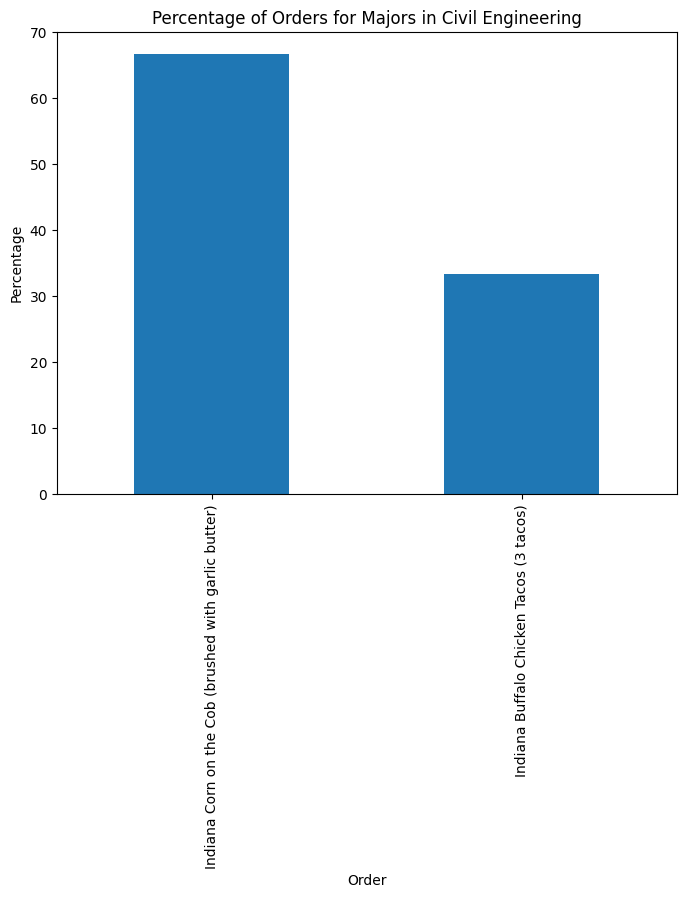

In [13]:
# Plot for majors
majors = df['Major'].unique()
for major in majors:
    major_data = df[df['Major'] == major]
    plot_percentage_distribution(major_data, major, "Majors")


# Charts displaying order preferences across all Universities

In [14]:
pd.crosstab(df['University'], df['Order'])

Order,Breaded Pork Tenderloin Sandwich,Cornbread Hush Puppies,Fried Catfish Basket,Hoosier BBQ Pulled Pork Sandwich,Indiana Buffalo Chicken Tacos (3 tacos),Indiana Corn on the Cob (brushed with garlic butter),Indiana Pork Chili,Sugar Cream Pie,Sweet Potato Fries,Ultimate Grilled Cheese Sandwich (with bacon and tomato)
University,,,,,,,,,,
Ball State University,220,16,8,1,29,228,208,184,13,178
Butler University,217,113,101,83,112,239,281,203,107,158
DePauw University,0,0,0,0,1,0,0,0,0,0
Indiana State University,37,215,212,270,162,19,13,73,214,94
Indiana University Bloomington,0,0,0,0,0,0,0,2,0,10
Indiana University-Purdue University Indianapolis (IUPUI),3,138,137,118,145,0,0,3,132,6
Purdue University,0,0,0,0,0,0,0,0,0,1
University of Evansville,0,23,31,9,42,0,0,0,36,2
University of Notre Dame,17,2,1,1,4,9,8,47,1,54


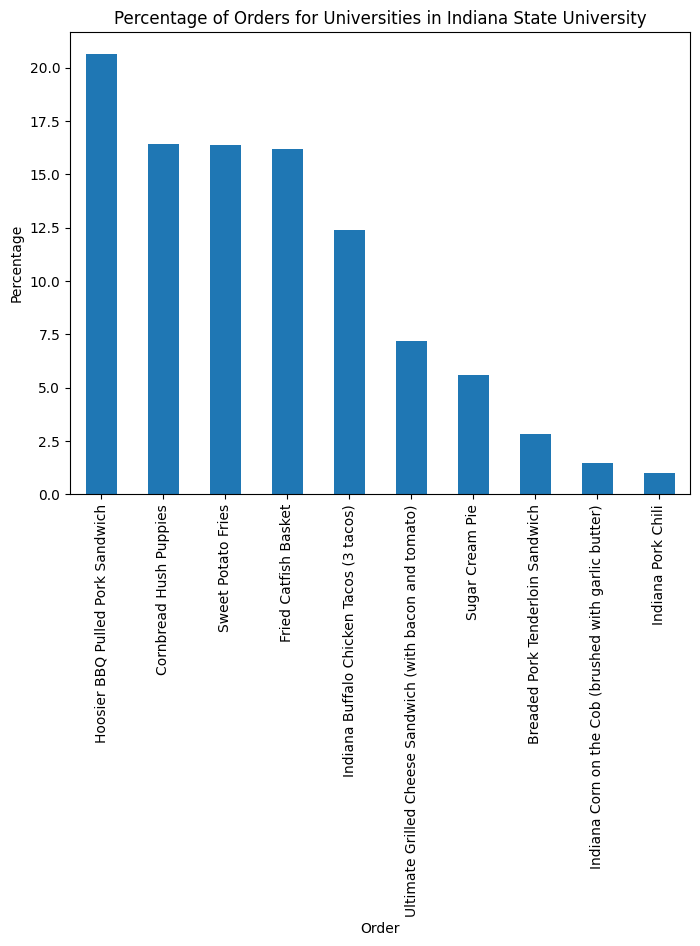

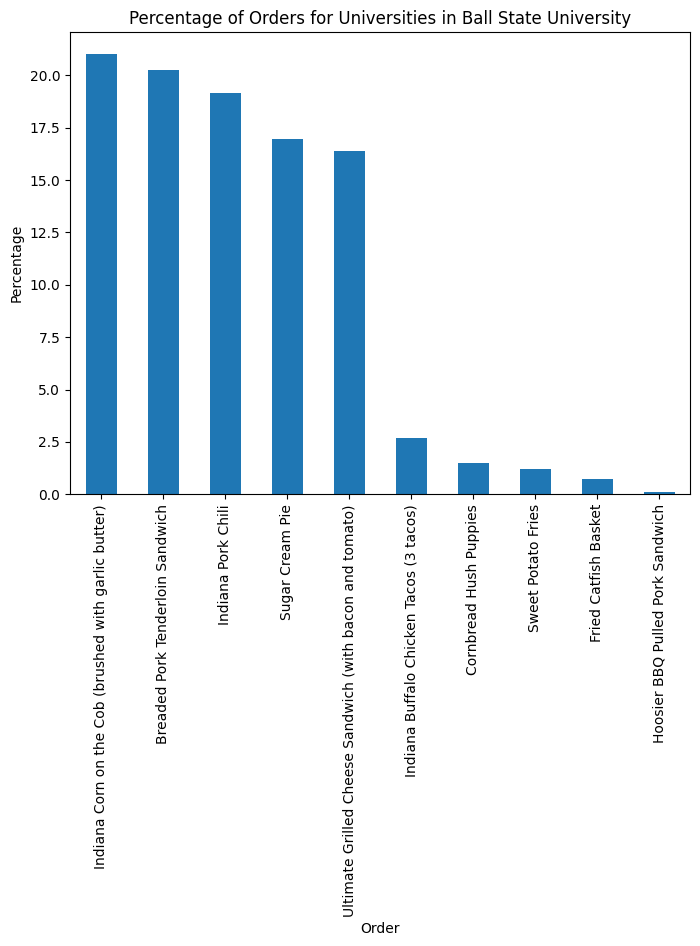

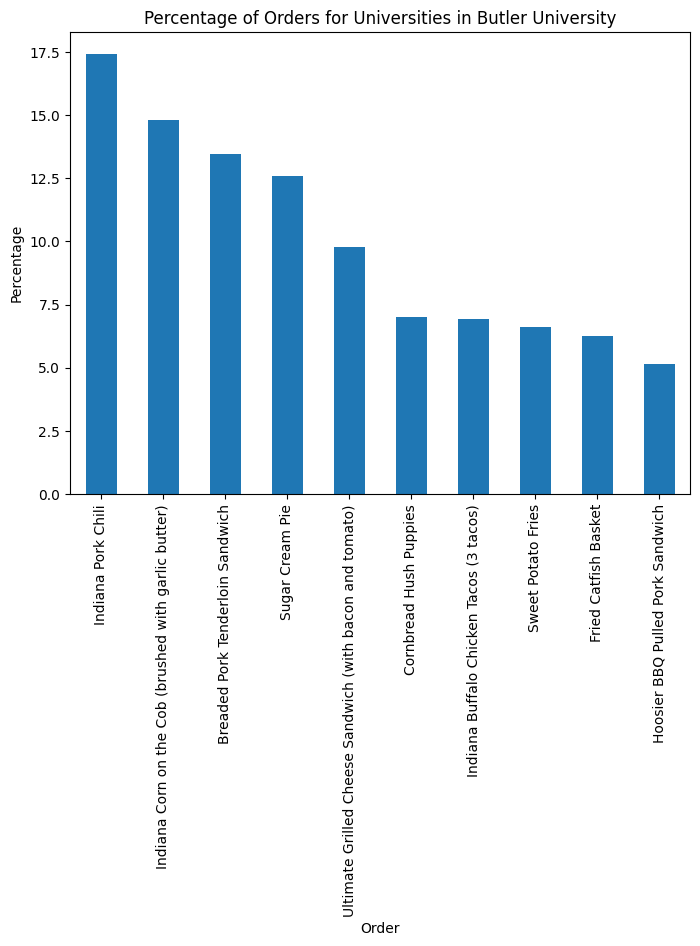

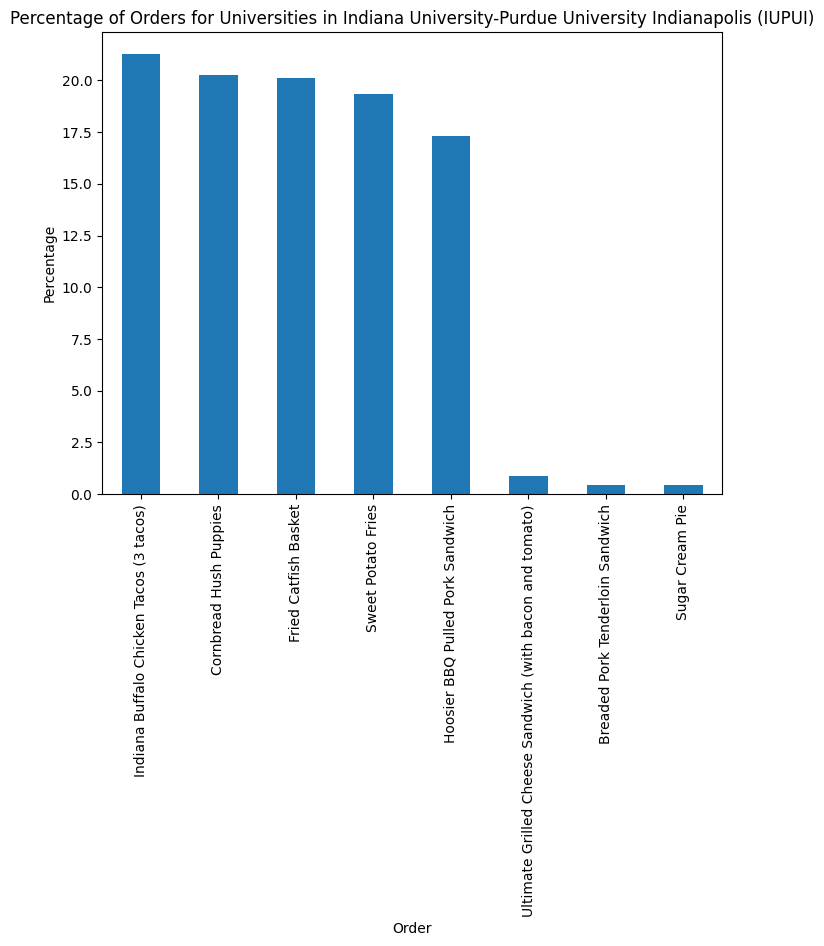

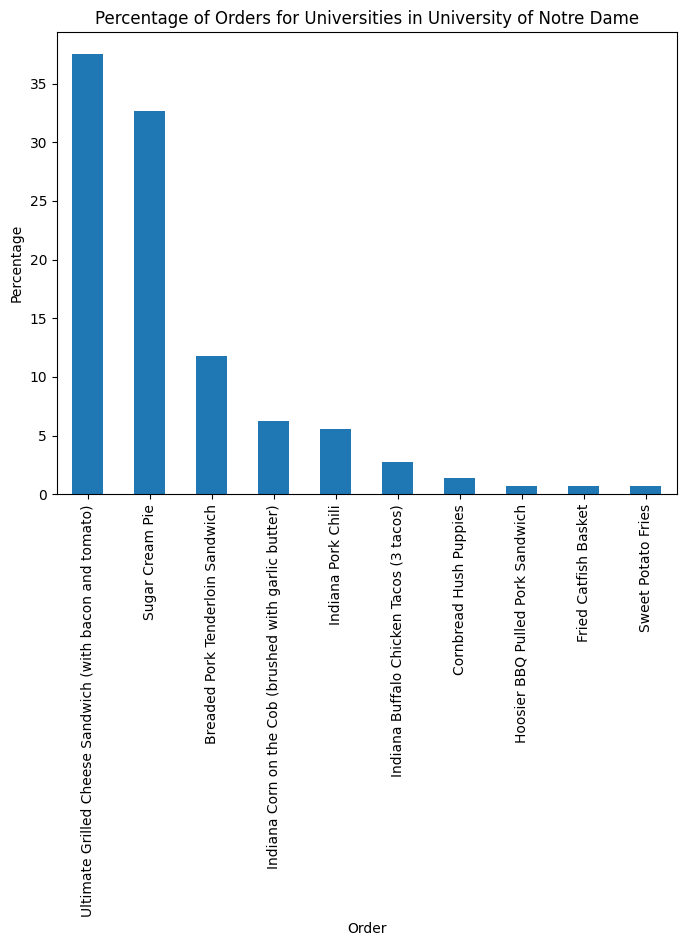

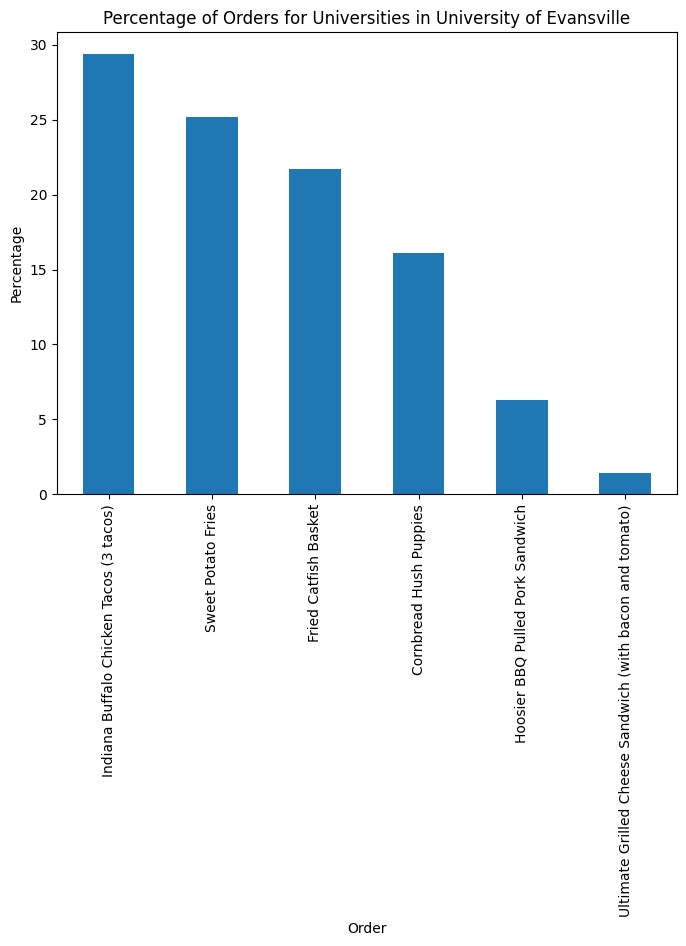

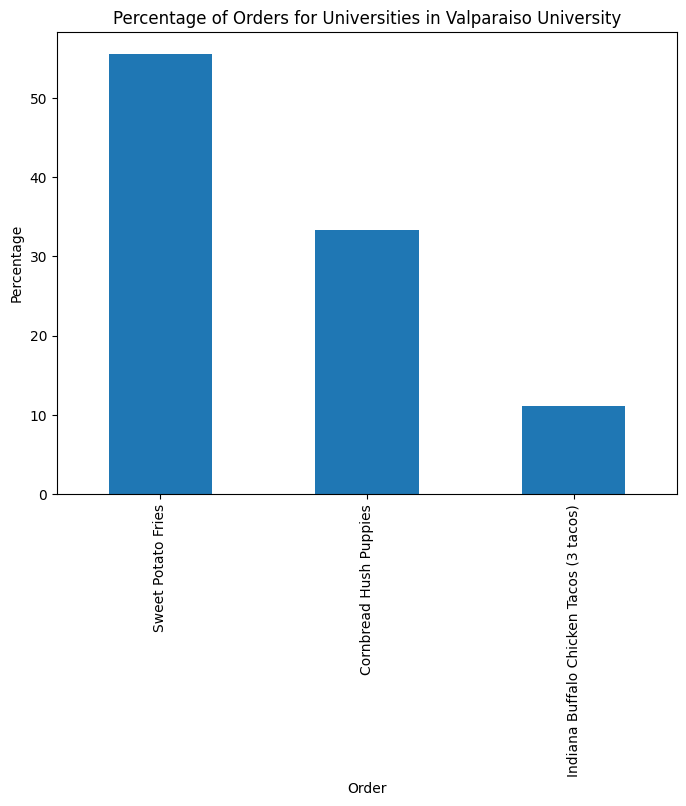

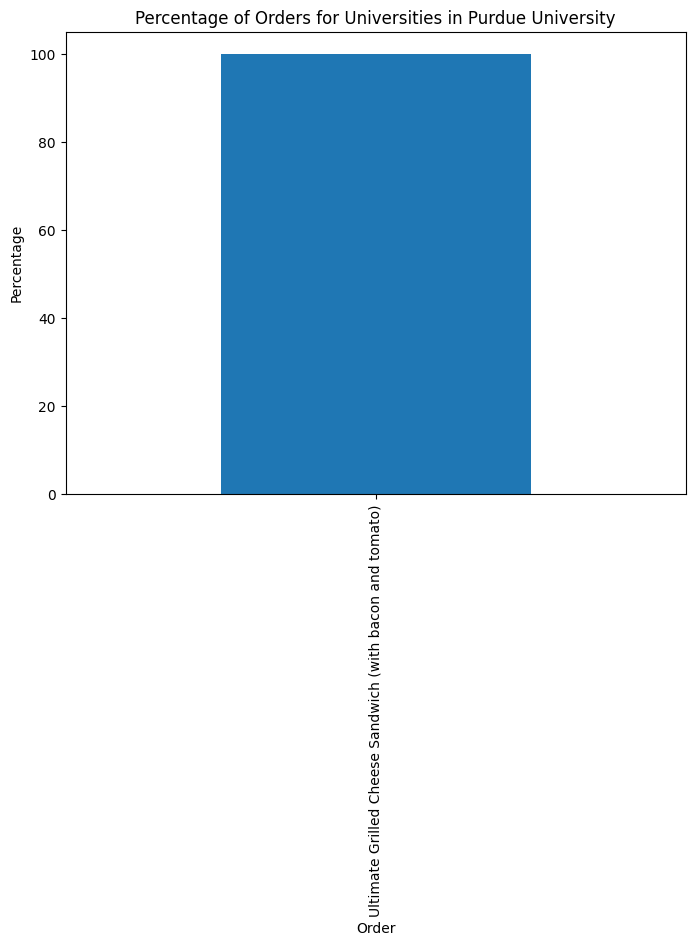

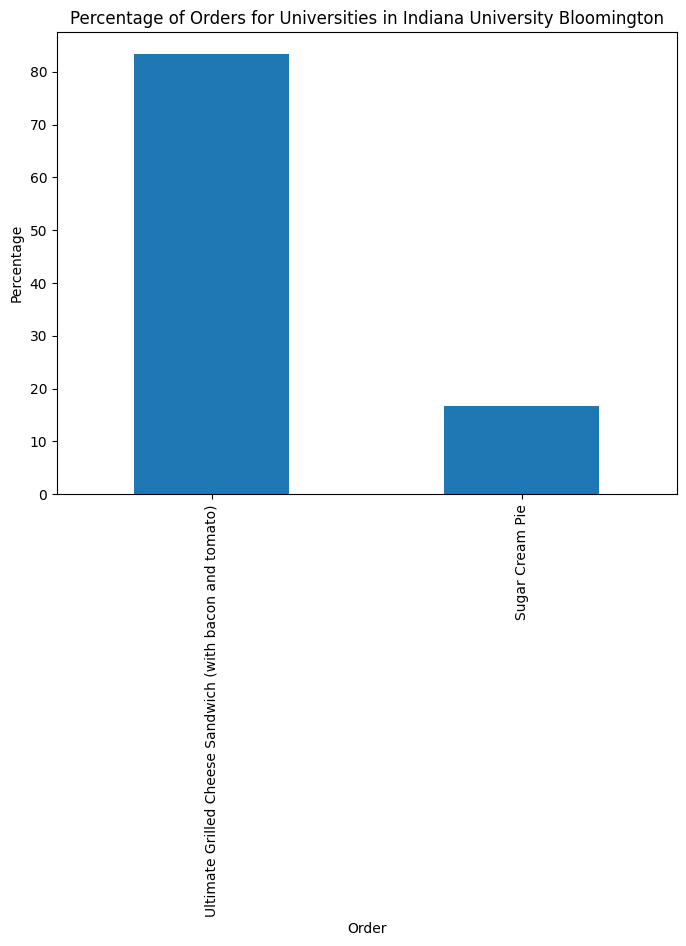

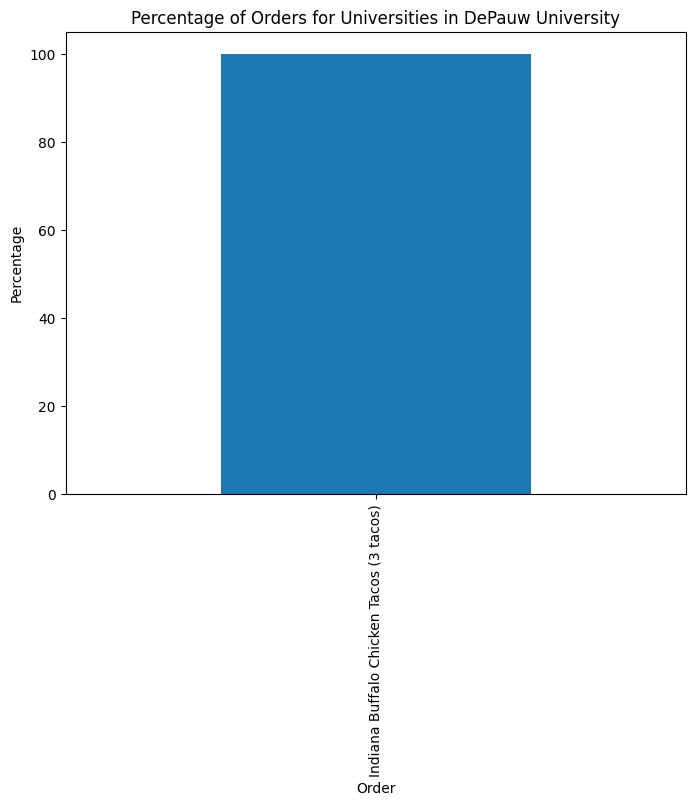

In [15]:
# Plot for universities
unis = df['University'].unique()
for uni in unis:
    uni_data = df[df['University'] == uni]
    plot_percentage_distribution(uni_data, uni, "Universities")

# Summary:

# Year:

Year 3 stands out as the most prevalent academic year among our customers, indicating that a significant portion of our clientele is likely in their third year of college. This valuable insight suggests that FoodX can tailor its marketing campaigns and menu offerings to align with the preferences of Year 3 students, potentially attracting even more business. 

# Major:

When it comes to academic majors, Chemistry emerges as the most popular choice among our customers. On the other end of the spectrum, Civil Engineering appears to be less represented. This data allows FoodX to consider crafting specialized menu items or promotions that specifically cater to students majoring in Chemistry. Furthermore, there's an opportunity to broaden the menu or promotions to attract students from less-represented majors like Civil Engineering, potentially diversifying the customer base.

# University:

Among the various universities we serve, Butler University stands out with the highest customer count, while DePauw University has fewer customers. This information is valuable for FoodX's marketing strategy. They can concentrate their promotional efforts on universities with higher customer representation, fine-tuning their approach to better serve the needs and preferences of these students. Simultaneously, exploring ways to expand their presence in universities with lower representation, such as DePauw University, can help FoodX tap into previously untapped markets and grow their customer base.er base.

# Final Model

Accuracy: 0.642
Classification Report:
                                                           precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.60      0.48      0.53        94
                                  Cornbread Hush Puppies       0.54      0.61      0.57       112
                                    Fried Catfish Basket       0.67      0.57      0.62       107
                        Hoosier BBQ Pulled Pork Sandwich       0.64      0.65      0.64       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.61      0.58      0.60        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.70      0.85      0.76        84
                                      Indiana Pork Chili       0.74      0.85      0.79        95
                                         Sugar Cream Pie       0.62      0.57      0.59       110
                                      Sweet Potato Fries       0.60      0.56

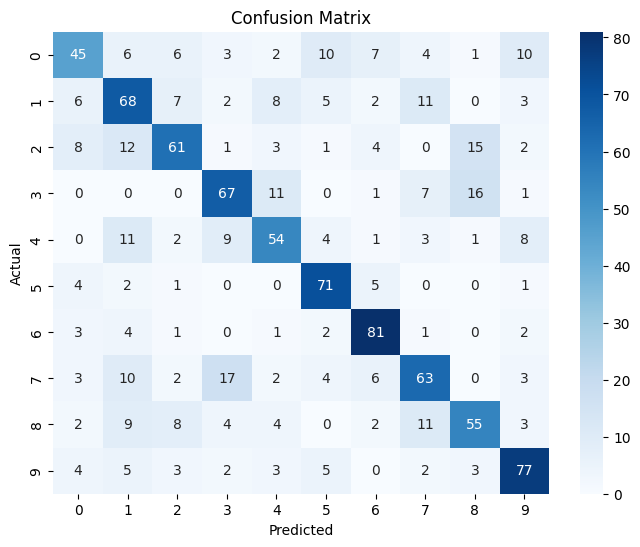

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data(path):
    # Load the dataset
    df = pd.read_csv(path)

    # Encode categorical features
    df['Student_Year_Num'] = df['Year'].str.extract(r'(\d+)').astype(float)
    university_unique = df['University'].unique()
    university_label = {value: label for label, value in enumerate(university_unique)}
    df['University_Label'] = df['University'].map(university_label)

    major_unique = df['Major'].unique()
    major_label = {value: label for label, value in enumerate(major_unique)}
    df['Major_Label'] = df['Major'].map(major_label)

    X = df.drop(columns=['Order', 'Year', 'University', 'Major'])
    y = df['Order']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train, model_file):
    # Create and train the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Save the trained model to a file
    joblib.dump(model, model_file)

def evaluate_model(model_file, X_test, y_test):
    # Load the trained model
    model = joblib.load(model_file)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, classification_rep

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = prepare_data(file_path)
    train_model(X_train, y_train, 'food_order_model.pkl')
    accuracy, classification_report = evaluate_model('food_order_model.pkl', X_test, y_test)

    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', classification_report)
    print("Confusion Matrix:")
    # Load the trained model
    model = joblib.load('food_order_model.pkl')
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Create a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()